Universidade Federal do Rio Grande do Sul (UFRGS)   
Programa de Pós-Graduação em Engenharia Civil (PPGEC)   

# PEC00025: Introdução à Teoria das Vibrações


### Trabalho 1

#### Aluno: Rodrigo Escolante Pereira
#### Cartão: 195492

[1.   Introdução](#section_1)  
[2.   Método adotado](#section_2)  
[3.   Experimento](#section_3)  
    [3.1. Descrição](#section_31)  
    [3.2. Resultados](#section_32)  
    [3.3. Periodograma](#section_33)  
[4. Conclusões](#section_4)  



## 1. Introdução <a name="section_1"></a> 

O objetivo deste trabalho é a aplicação do _Método de Duhamell_ para a obtenção da pseudo aceleração máxima em torno do eixo z e o periodograma de uma superfície sujeita à vibração forçada, considerando um sistema com 1 grau de liberdade. Para tanto, realizou-se medição através do aplicativo ````INVH```` de uma fonte emissora de vibrações escolhida pelo autor e os métodos da classe ``MRPy`` desenvolvida em linguagem ``Python`` pelo professor Marcelo Maia Rocha.

## 2. Método adotado <a name="section_2"></a> 

Os resultados deste trabalho, baseam-se na aplicação do _Método de Duhamel_. Essa solução numérica consiste na aplicação das equações abaixo para a resolução de sistemas lineares pelo cálculo de deslocamentos futuros a partir de deslocamentos previamente calculados em instantes de tempo anteriores. Para tanto, faz-se uso das seguintes formulações:

\begin{align*}
e_i &= \exp ( -\zeta\omega_{\rm n} t_i ) \\
s_i &= \sin \omega_{\rm D} t_i  \\
c_i &= \cos \omega_{\rm D} t_i  \\
F_i &=  F(t_i)
\end{align*}

\begin{align*}
A_i &= \Delta t \; \sum_{j=0}^i e_j c_j F_j \\
B_i &= \Delta t \; \sum_{j=0}^i e_j s_j F_j
\end{align*}

$$ u_i = u_{0i} + \frac{1}{m \omega_{\rm D} } \left( \frac{A_i s_i - B_i c_i}{e_i} \right)$$

A posição inicial, $u_{0i}$ é obtida pela seguinte equação: 

$$ u_{0i} = \frac{1}{e_i} 
            \left[ u_0 c_i + 
            \left( \frac{v_0 + u_0 \zeta \omega_{\rm n}}{\omega_{\rm D}} \right) s_i \right]$$

A grande vantagem deste método, além de sua eficiência computacional, está na ausência de limitação quanto ao período de tempo adotado para cálculo, fato este que poderia produzir problemas de divergência como pode ocorrer no _Método das Diferenças Finitas_.

### 3. Experimento <a name="section_3"></a>

#### 3.1. Descrição <a name="section_31"></a>

Para o presente trabalho foi realizada a medição da vibração gerada pelo funcionamento de uma maquina de lavar em modo de centrifugação sobre a superfície do piso. As leituras de aceleração em torno dos eixos x, y e z foram realizadas pelo aplicativo para android ``INVH`` considerando um curto instante de tempo. Para este experimento, foi admitido um modelo massa-mola com 1 grau de liberdade, sendo a massa do sistema atribuída como unitária e o coeficiente de amortecimento utilizado de 1%.

#### 3.2. Resultados <a name="section_32"></a>

Uma vez efetuadas todas as leituras, exportou-se o arquivo gerado pelo ``INVH`` para o processamento dos dados. Todos os cálculos posteriores foram realizados utilizando a linguagem de programação ``Python`` e as rotinas presentes nas classes ``numpy``, ``matplotlib.pyplot`` e ``MRPy``. A seguir serão apresentados as acelerações encontradas:

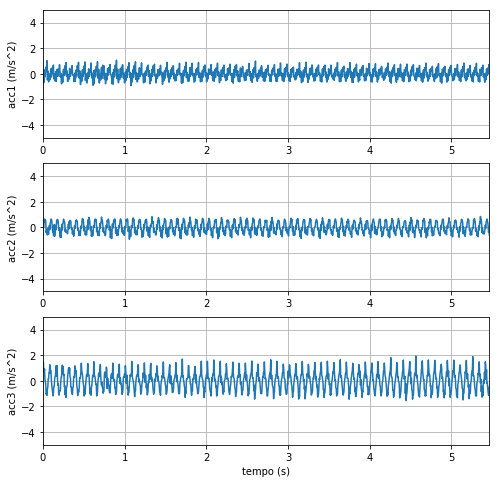

In [17]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from MRPy import MRPy

m  = 1       # massa do sistema em kg
Tn = np.linspace (0.1,10,100) #vetor de tempo
fn = 1/Tn       # frequência natural em Hz
zt = 0.01      # taxa de amortecimento
u0 = 0.        # posição inicial
v0 = 0.        # velocidade inicial

H  = MRPy.Heaviside(NX=1, N=1000, t0=2, Td=10)
data = MRPy.from_file('data/maquinadelavar', form='invh').zero_mean()
t    = data.t_axis()

plt.figure(6, figsize=(8, 8), clear=True)

for kX, acc in enumerate(data):
    
    plt.subplot(3, 1 ,kX+1)
    plt.plot(t, acc)

    plt.xlim(0, data.Td);   
    plt.ylim(-5, 5);
    plt.ylabel('acc{0} (m/s^2)'.format(kX+1)) 

    plt.grid(True) 

plt.xlabel('tempo (s)');


Os gráficos acima representam as acelerações encontradas nos eixos x, y e z com relação ao tempo. Para este trabalho a solução pelo _Método de Duhamel_ foi utilizada considerando unicamente a aceleração em torno do eixo z por representar os deslocamentos mais consideráveis, conforme se observa:

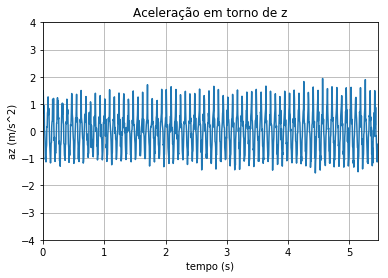

In [18]:
az = MRPy(data[2],data.fs)
t = az.t_axis()
plt.plot(t, az[0])
plt.title('Aceleração em torno de z')
plt.xlim(0, az.Td);   
plt.ylim(-4, 4);
plt.ylabel('az (m/s^2)') 
plt.grid(True) 
plt.xlabel('tempo (s)');

O passo seguinte foi gerar o gráfico da pseudo aceleração em z. Para isso, foi criado um vetor de $up$, cuja função é armazenar os valores máximos de deslocamentos obtidos pela integração pelo _Método de Duhamell_ para cada uma das frequências presentes no vetor $fn$. Estas frequências foram calculadas considerando períodos de tempo variando de 0,1s até 10s.

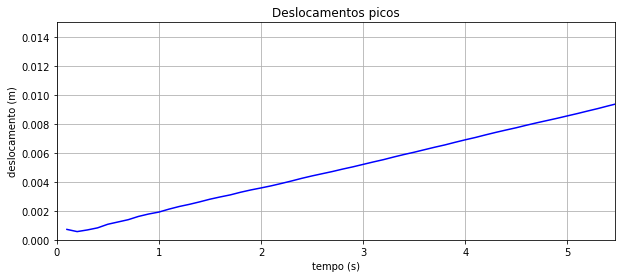

In [19]:
up = np.zeros (fn.shape)

for i, f in enumerate (fn):
    u = az.sdof_Duhamel(f, zt, u0, v0)/m
    up[i] = u.max()
    
plt.figure(5, figsize=(10, 4), clear=True)
plt.plot(Tn, up, 'b')
plt.title('Deslocamentos picos')
plt.xlim(0, az.Td);        plt.xlabel('tempo (s)') 
plt.ylim(0, 0.015);   plt.ylabel('deslocamento (m)') 

plt.grid(True)

Sob posse dos deslocamentos máximos, determina-se a pseudo aceleração do sistema pela seguinte equação:

\begin{align*}
a_p= \omega^2.u_p
\end{align*}

O gráfico seguinte demonstra a aplicação desta relação:

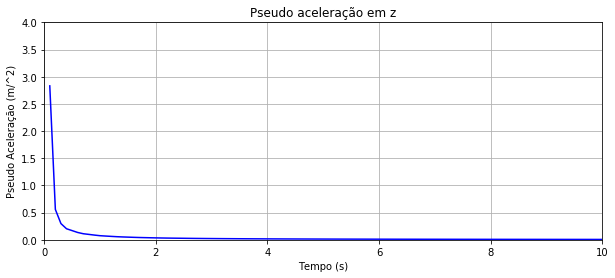

In [20]:
spa = ((2*np.pi*fn)**2)*up
plt.figure(6, figsize=(10, 4), clear=True)
plt.plot(Tn, spa, 'b')
plt.title('Pseudo aceleração em z')
plt.xlim(0, 10); plt.xlabel('Tempo (s)')
plt.ylim(0, 4); plt.ylabel('Pseudo Aceleração (m/^2)')
plt.grid(True)

O valor máximo de pseudo aceleração em torno do eixo z é:

In [21]:
print(max(spa))

2.8316063042952546


  #### 3.3. Periodograma <a name="section_33"></a>

O periodograma de _input_ da excitação em torno do eixo z é apresentado a seguir. Como pode-se observar a frequência de 13 Hz é predominante, indicando que este valor está próximo da frequência natural do experimento.

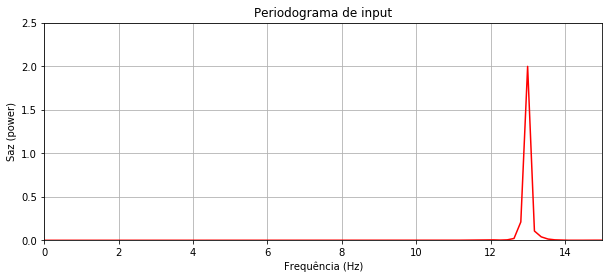

In [22]:
#Periodograma de input
Saz, fs = az.periodogram()
f = az.f_axis()
plt.figure(7, figsize=(10, 4), clear=True)
plt.title('Periodograma de input')
plt.plot(f, Saz[0],'r' )
plt.xlim(0, 15); plt.xlabel('Frequência (Hz)')
plt.ylim(0, 2.5); plt.ylabel('Saz (power)')
plt.grid(True)

Para o cálculo do periodograma de _output_ é necessário determinar o deslocamento máximo para a frequência predominante do experimento. Para tanto, utiliza-se novamente o _Método de Duhamel_, considerando unicamente a frequência de 13 Hz, que provou ser a que continha maior quantidade de energia, conforme gráfico anterior. 

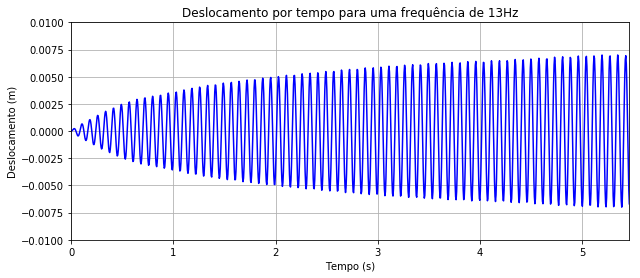

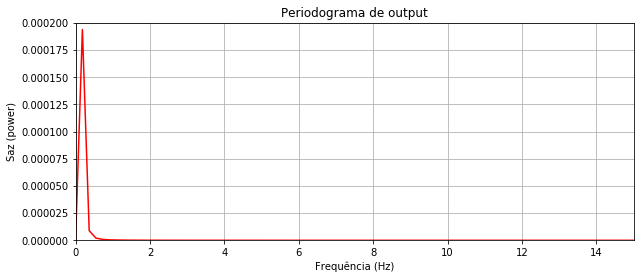

In [23]:
#Duhamel para obter deslocamento para frequência de 13Hz
u_DH = az.sdof_Duhamel(13, zt, u0, v0)/m
plt.figure(8, figsize=(10, 4), clear=True)
plt.plot(t, u_DH[0], 'b')
plt.title('Deslocamento por tempo para uma frequência de 13Hz')
plt.xlim(0, az.Td)
plt.xlabel('Tempo (s)') 
plt.ylim(-0.01, 0.01)
plt.ylabel('Deslocamento (m)') 
plt.grid(True)
 
#Periodograma de output
Saz, fs = u.periodogram()
f = u.f_axis() 
plt.figure(9, figsize=(10, 4), clear=True)
plt.plot(f, Saz[0],'r')
plt.title('Periodograma de output')
plt.xlim(0, 15)
plt.xlabel('Frequência (Hz)')
plt.ylim(0,  0.0002)   
plt.ylabel('Saz (power)') 
plt.grid(True)

### 4. Conclusões <a name="section_4"></a>

Este trabalho apresentou os procedimentos utilizados para a elaboração do gráfico da pseudo aceleração e seu espectro em torno do eixo z. Foi considerado a vibração de uma máquina de lavar em atividade de centrifugação. A massa foi adotada como unitária, afim de obter deslocamentos máximos. Os valores encontrados demonstraram que o movimento do eletroeletrônico apresentou resultados irrisórios com deslocamentos muito próximos de zero e pseudo aceleração máxima baixa. Sendo assim, não interferem na segurança dos componentes estruturais de uma edificação.